In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=aa4a43107d205b215d4e8e4420bcbfaba0d99fdfc90207b08eb0e107bf66e3b2
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
size = ctrl.Antecedent(np.arange(300,601,0.01),'size') 
defect = ctrl.Antecedent(np.arange(0,20,0.01),'defect')
density = ctrl.Antecedent(np.arange(0,1,0.001),'density')
quality = ctrl.Consequent(np.arange(0,5,0.01),'quality')

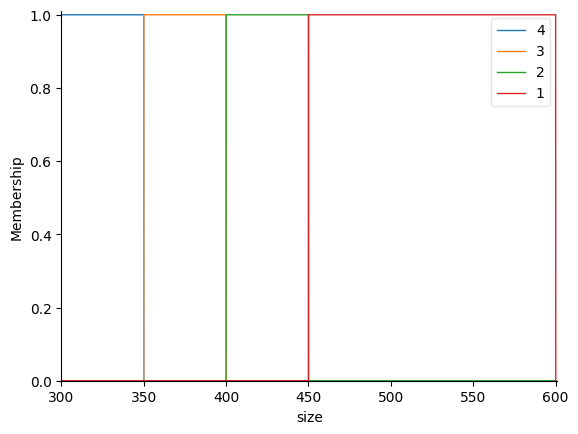

In [4]:
size['4'] = fuzz.trapmf(size.universe,[300,300,350,350])
size['3'] = fuzz.trapmf(size.universe,[350,350,400,400])
size['2'] = fuzz.trapmf(size.universe,[400,400,450,450])
size['1'] = fuzz.trapmf(size.universe,[450,450,600,600])
size.view()

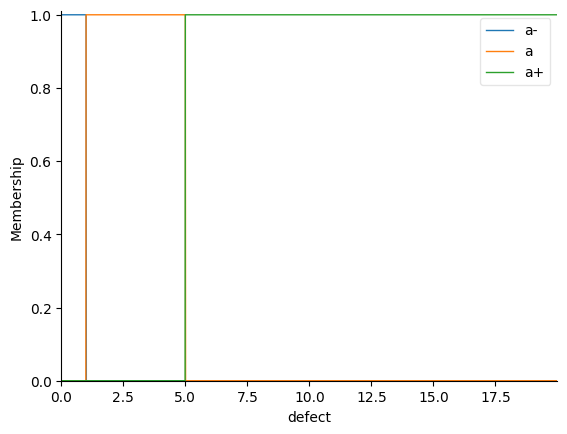

In [5]:
defect['a-'] = fuzz.trapmf(defect.universe,[0,0,1,1])
defect['a'] = fuzz.trapmf(defect.universe,[1,1,5,5])
defect['a+'] = fuzz.trapmf(defect.universe,[5,5,20,20])
defect.view()

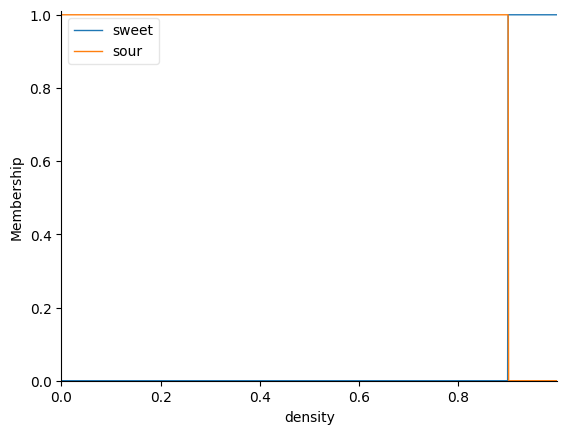

In [6]:
density['sweet'] = fuzz.trapmf(density.universe,[0.9,0.9,1,1])
density['sour'] = fuzz.trapmf(density.universe,[0,0,0.9,0.9])
density.view()

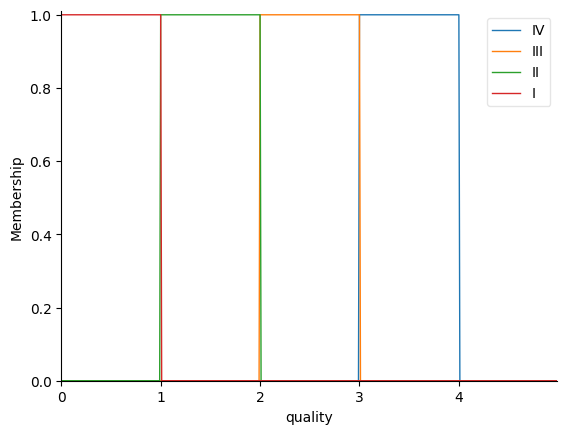

In [7]:
quality['IV'] = fuzz.trapmf(quality.universe,[3,3,4,4])
quality['III'] = fuzz.trapmf(quality.universe,[2,2,3,3])
quality['II'] = fuzz.trapmf(quality.universe,[1,1,2,2])
quality['I'] = fuzz.trapmf(quality.universe,[0,0,1,1])
quality.view()

In [8]:
rule1=ctrl.Rule(size['4']&defect['a-']&density['sweet'],quality['IV'])
rule2=ctrl.Rule(size['4']&defect['a-']&density['sour'],quality['IV'])
rule3=ctrl.Rule(size['4']&defect['a']&density['sweet'],quality['IV'])
rule4=ctrl.Rule(size['4']&defect['a']&density['sour'],quality['IV'])
rule5=ctrl.Rule(size['4']&defect['a+']&density['sweet'],quality['IV'])
rule6=ctrl.Rule(size['4']&defect['a+']&density['sour'],quality['IV'])
rule7=ctrl.Rule(size['3']&defect['a-']&density['sweet'],quality['III'])
rule8=ctrl.Rule(size['3']&defect['a-']&density['sour'],quality['IV'])
rule9=ctrl.Rule(size['3']&defect['a']&density['sweet'],quality['IV'])
rule10=ctrl.Rule(size['3']&defect['a']&density['sour'],quality['IV'])
rule11=ctrl.Rule(size['3']&defect['a+']&density['sweet'],quality['IV'])
rule12=ctrl.Rule(size['3']&defect['a+']&density['sour'],quality['IV'])
rule13=ctrl.Rule(size['2']&defect['a-']&density['sweet'],quality['II'])
rule14=ctrl.Rule(size['2']&defect['a-']&density['sour'],quality['II'])
rule15=ctrl.Rule(size['2']&defect['a']&density['sweet'],quality['III'])
rule16=ctrl.Rule(size['2']&defect['a']&density['sour'],quality['IV'])
rule17=ctrl.Rule(size['2']&defect['a+']&density['sweet'],quality['IV'])
rule18=ctrl.Rule(size['2']&defect['a+']&density['sour'],quality['IV'])
rule19=ctrl.Rule(size['1']&defect['a-']&density['sweet'],quality['I'])
rule20=ctrl.Rule(size['1']&defect['a-']&density['sour'],quality['I'])
rule21=ctrl.Rule(size['1']&defect['a']&density['sweet'],quality['I'])
rule22=ctrl.Rule(size['1']&defect['a']&density['sour'],quality['II'])
rule23=ctrl.Rule(size['1']&defect['a+']&density['sweet'],quality['II'])
rule24=ctrl.Rule(size['1']&defect['a+']&density['sour'],quality['III'])

Your fruit weight (300-600g):456
Area of defect on your fruit (0-20cm2):3.5
Density of your fruit (0-1):0.75
The fruit type:  1


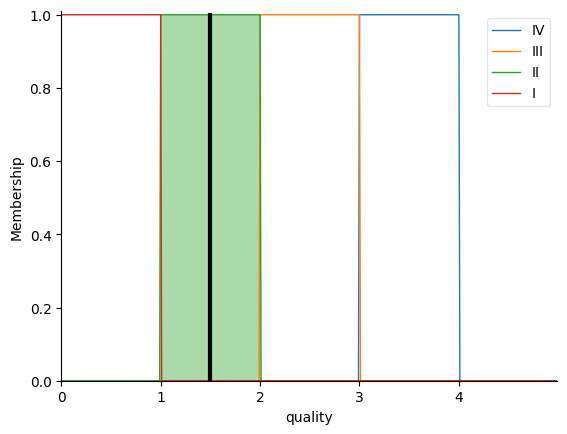

In [17]:
type_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,	rule13,	rule14,	rule15,	rule16,	rule17,	rule18,	rule19,	rule20,	rule21,	rule22,	rule23,	rule24])
type = ctrl.ControlSystemSimulation(type_ctrl)
type.input['size']=int(input('Your fruit weight (300-600g):'))
type.input['defect']=float(input('Area of defect on your fruit (0-20cm2):'))
type.input['density']=float(input('Density of your fruit (0-1):'))
type.compute()
print('The fruit type: ',str(int(type.output['quality'])))
quality.view(sim=type)